In [ ]:
import networkx as nx
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten

def run(A, k=2):

  num_node = A.shape[0]
  d = np.sum(A, axis=0)
  temp = np.sum(d, axis=0)
  temp = temp//2
  num_edge = temp

  GG = nx.convert_matrix.from_numpy_matrix(A)
  B = nx.linalg.modularitymatrix.modularity_matrix(GG)


  eigenvalues, eigenvectors = np.linalg.eig(B)


  sorted_eigenvalues = np.argsort(eigenvalues)[::-1]


  indices = sorted_eigenvalues[:k]


  X = np.zeros((num_node, k))
  for j, index in enumerate(indices):
      X[:,j] = np.nan_to_num(eigenvectors[:, index].flatten())

  X = whiten(X)
  centroids,_ = kmeans(X, k)
  cluster_assign, _ = vq(X, centroids)


  plot_obj = [X, centroids, cluster_assign]

  return cluster_assign

In [ ]:
import gzip
import shutil
with gzip.open('wiki-Vote.txt.gz', 'rb') as f_in:
    with open('wiki-Vote.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
lines = []
with open(r"wiki-Vote.txt", 'r') as fp:
    lines = fp.readlines()

with open(r"wiki-Vote.txt", 'w') as fp:
    for number, line in enumerate(lines):
        if number not in [0,1,2,3]:
            fp.write(line)

In [ ]:
import networkx as nx
import numpy as np


G = nx.Graph()
with open('wiki-Vote.txt', "r") as file:
    lines = file.readlines()
    for line in lines:
        values = line.strip().split()

        G.add_edges_from([(values[0],
                           values[1])])




In [ ]:
from networkx.algorithms.community.quality import modularity
import random

stale_rands = []
modularity_scores = []

sets = [list(G.nodes())]

idx = {}
for n in G.nodes():
  idx[n] = 0

def f(g, s, m=float('-inf')):
  base = -1
  while base < 0:
    rand = random.randint(0, 10000000)
    if rand in stale_rands or rand-1 in stale_rands: continue
    base = rand

  clus = run(nx.adjacency_matrix(g))
  clus = clus + base
  unq = np.unique(clus)


  new_m = modularity(G, sets)
  print(new_m)
  if new_m >= m:
    modularity_scores.append(new_m)
    for i, n in enumerate(np.array(g.nodes)):
      idx[n] = base + clus[i]
    set1 = set(map(lambda x: np.array(g.nodes)[x], np.where(clus==unq[0])[0]))
    set2 = set(map(lambda x: np.array(g.nodes)[x], np.where(clus==unq[1])[0]))

    del sets[sets.index(s)]
    sets.append(list(set1))
    sets.append(list(set2))

    g1 = G.subgraph(set1)
    f(g1, list(set1), new_m)
    g2 = G.subgraph(set2)
    f(g2, list(set2), new_m)

f(G, list(G.nodes()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


0.0
0.18814839552844898
0.18124706591334647
0.18124706591334647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


0.18124706591334647
0.19583281769329455
0.19583281769329455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


0.19583281769329455
0.20650165513109786
0.19690932048427134
0.19690932048427134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


0.19690932048427134
0.19832849959090298
0.19350178256874848
0.19350178256874848


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


0.19350178256874848


In [ ]:
vals = np.unique(list(idx.values()))
for i, x in enumerate(vals):
  for k, v in idx.items():
    if v == x:
      idx[k] = i
idx

{'30': 6,
 '1412': 6,
 '3352': 3,
 '5254': 2,
 '5543': 2,
 '7478': 6,
 '3': 4,
 '28': 4,
 '39': 4,
 '54': 4,
 '108': 6,
 '152': 4,
 '178': 4,
 '182': 4,
 '214': 4,
 '271': 4,
 '286': 6,
 '300': 6,
 '348': 4,
 '349': 6,
 '371': 4,
 '567': 6,
 '581': 6,
 '584': 6,
 '586': 6,
 '590': 4,
 '604': 6,
 '611': 6,
 '8283': 6,
 '25': 4,
 '6': 4,
 '8': 4,
 '19': 4,
 '23': 4,
 '29': 4,
 '33': 4,
 '35': 4,
 '50': 4,
 '55': 4,
 '75': 4,
 '80': 4,
 '86': 4,
 '94': 4,
 '127': 4,
 '154': 4,
 '192': 4,
 '224': 4,
 '226': 4,
 '246': 6,
 '252': 4,
 '255': 4,
 '257': 4,
 '261': 4,
 '273': 6,
 '280': 4,
 '282': 4,
 '299': 4,
 '302': 6,
 '306': 4,
 '308': 4,
 '310': 4,
 '322': 4,
 '325': 4,
 '339': 4,
 '356': 4,
 '358': 6,
 '363': 6,
 '370': 4,
 '373': 6,
 '377': 6,
 '379': 6,
 '407': 5,
 '415': 4,
 '422': 6,
 '428': 6,
 '439': 4,
 '488': 4,
 '514': 6,
 '545': 4,
 '549': 4,
 '560': 4,
 '592': 6,
 '600': 4,
 '645': 6,
 '650': 4,
 '659': 4,
 '664': 4,
 '667': 4,
 '673': 4,
 '675': 4,
 '696': 4,
 '706': 4,
 '72

In [ ]:
modularity_scores

[0.0,
 0.18124706591334647,
 0.18814839552844898,
 0.19583281769329455,
 0.19690932048427134,
 0.19832849959090298,
 0.20644266777349332,
 0.20650165513109786]

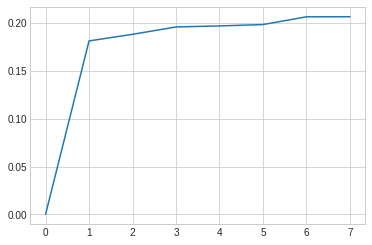

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

plt.plot(range(len(modularity_scores)), modularity_scores)
plt.show()